In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
import warnings  
warnings.filterwarnings("ignore")  
  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
from sklearn import metrics  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
dc=pd.read_csv(r"city_day.csv")
dc 

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [3]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
City          29531 non-null object
Date          29531 non-null object
PM2.5         24933 non-null float64
PM10          18391 non-null float64
NO            25949 non-null float64
NO2           25946 non-null float64
NOx           25346 non-null float64
NH3           19203 non-null float64
CO            27472 non-null float64
SO2           25677 non-null float64
O3            25509 non-null float64
Benzene       23908 non-null float64
Toluene       21490 non-null float64
Xylene        11422 non-null float64
AQI           24850 non-null float64
AQI_Bucket    24850 non-null object
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
dc.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [5]:
dc.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
dc["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [7]:
dc.nunique()

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

In [8]:
dc.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
df=dc[["NO2","SO2","PM10","PM2.5","AQI","AQI_Bucket"]]
df

NO2    SO2   PM10  PM2.5   AQI    AQI_Bucket
0      18.22  27.64    NaN    NaN   NaN           NaN
1      15.69  24.55    NaN    NaN   NaN           NaN
2      19.30  29.07    NaN    NaN   NaN           NaN
3      18.48  18.59    NaN    NaN   NaN           NaN
4      21.42  39.33    NaN    NaN   NaN           NaN
...      ...    ...    ...    ...   ...           ...
29526  25.06   8.55  50.94  15.02  41.0          Good
29527  26.06  12.72  74.09  24.38  70.0  Satisfactory
29528  29.53   8.42  65.73  22.91  68.0  Satisfactory
29529  29.26   9.84  49.97  16.64  54.0  Satisfactory
29530  26.85   2.10  66.00  15.00  50.0          Good

[29531 rows x 6 columns]

In [10]:
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].std())
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].std())
df['AQI']=df['AQI'].fillna(df['AQI'].std())
df['AQI_Bucket']=df['AQI_Bucket'].fillna("Moderate")

In [11]:
df['AQI_Bucket'].mode()

0    Moderate
dtype: object

In [12]:
df.isnull().sum()

NO2           0
SO2           0
PM10          0
PM2.5         0
AQI           0
AQI_Bucket    0
dtype: int64

In [13]:
df

NO2    SO2      PM10      PM2.5         AQI    AQI_Bucket
0      18.22  27.64  90.60511  64.661449  140.696585      Moderate
1      15.69  24.55  90.60511  64.661449  140.696585      Moderate
2      19.30  29.07  90.60511  64.661449  140.696585      Moderate
3      18.48  18.59  90.60511  64.661449  140.696585      Moderate
4      21.42  39.33  90.60511  64.661449  140.696585      Moderate
...      ...    ...       ...        ...         ...           ...
29526  25.06   8.55  50.94000  15.020000   41.000000          Good
29527  26.06  12.72  74.09000  24.380000   70.000000  Satisfactory
29528  29.53   8.42  65.73000  22.910000   68.000000  Satisfactory
29529  29.26   9.84  49.97000  16.640000   54.000000  Satisfactory
29530  26.85   2.10  66.00000  15.000000   50.000000          Good

[29531 rows x 6 columns]

In [14]:
X=df[["NO2","SO2","PM10","PM2.5"]]
Y=df['AQI']
X.head()

NO2    SO2      PM10      PM2.5
0  18.22  27.64  90.60511  64.661449
1  15.69  24.55  90.60511  64.661449
2  19.30  29.07  90.60511  64.661449
3  18.48  18.59  90.60511  64.661449
4  21.42  39.33  90.60511  64.661449

In [15]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=15)
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (20671, 4)
The dimension of X_test is (8860, 4)


# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred1=model1.predict(X_test)
y_pred1

array([259.63111811,  63.28800022,  94.22749214, ..., 140.89259833,
        46.89215393, 222.34249586])

In [25]:
# R_Square Erroe
r2score=r2_score(Y_test,y_pred1)
RMSE=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred1)))

print('RSquared error value for Linear Regression Model:',r2score)
print('RMS error value for Linear Regression Model:',RMSE)

RSquared error value for Linear Regression Model: 0.5795042337715461
RMS error value for Linear Regression Model: 82.54916130363635


Text(0.5, 1.0, 'Linear Regression model performance')

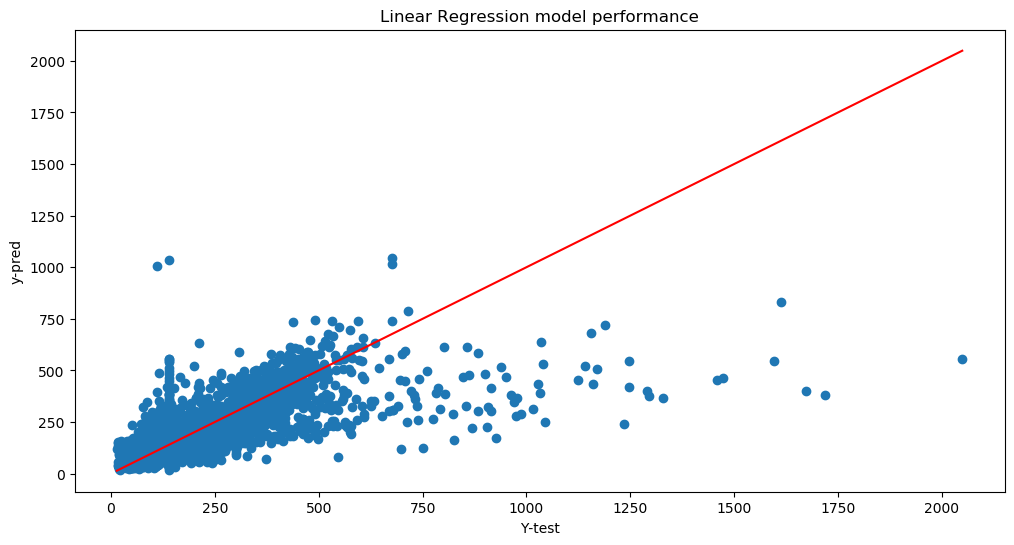

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred1)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.title("Linear Regression model performance")

# RandomForest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred2=model2.predict(X_test)
y_pred2

array([291.8778634 ,  64.8       , 124.1839317 , ..., 129.83      ,
        48.18      , 160.39448776])

In [22]:
r2score2=r2_score(Y_test,y_pred2)
RMSE2=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))

print('RSquared error value for Random Forest Regressor model :',r2score2)
print('RMS error value for Random Forest Regressor model :',RMSE2)

RSquared error value for Random Forest Regressor model : 0.7048085389035557
RMS error value for Random Forest Regressor model : 69.16458043947404


Text(0.5, 1.0, 'Random Forest Regression model performance')

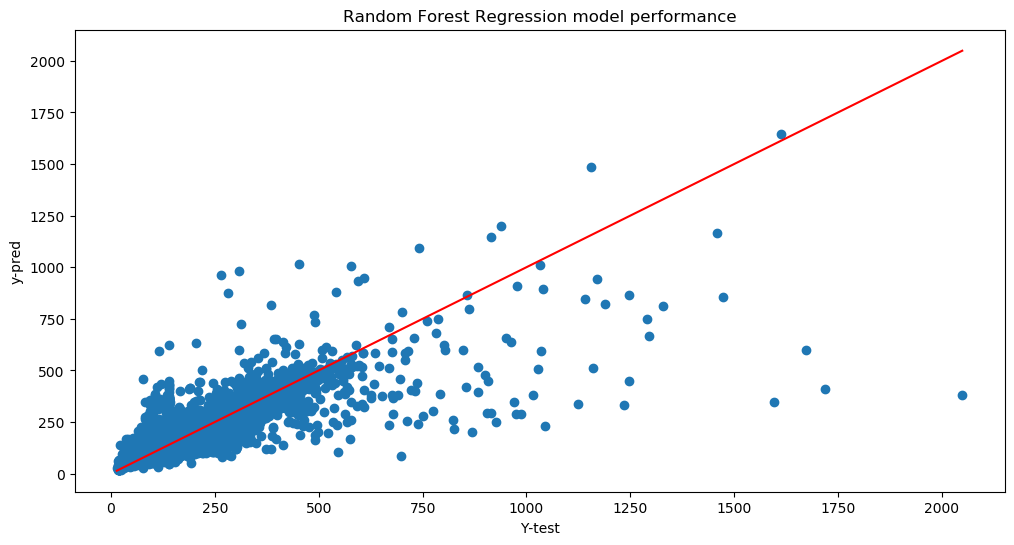

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred2)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.title("Random Forest Regression model performance")